# Kmeans_Visualization

## Contents

1. **Library Imports and Setup**
   - Necessary libraries are imported, including `pandas`, `matplotlib`, `seaborn`, `pickle`, `sklearn`, `nltk`, and others for data processing and visualization.

2. **Data Loading**
   - The dataset `tweets_with_labels.csv` and K-Means cluster labels from `kmeans_clustering.pkl` are loaded.
   - Basic data inspection is performed, including checking the length of the DataFrame and labels.

3. **Dimensionality Reduction**
   - PCA (Principal Component Analysis) is applied to reduce the dimensionality of the TF-IDF matrix to 100 components.
   - Reduced features are used for visualizing clusters.

4. **Cluster Visualization**
   - A bar graph shows the distribution of data points across different clusters.
   - A scatter plot visualizes clusters in the reduced feature space, colored by cluster labels.

5. **Cluster Analysis**
   - Random and sample texts from each cluster are displayed for manual inspection.
   - Sentiment analysis is performed using the VADER sentiment analyzer to assess the sentiment of texts in each cluster.

6. **Sentiment Analysis Visualization**
   - A bar plot displays the average sentiment scores for each cluster.
   - The texts and their associated sentiments are printed for each cluster, categorized into negative, neutral, and positive sentiments.

7. **Text Classification**
   - Negative, neutral, and positive texts are extracted from the clusters based on sentiment scores.
   - The first few examples of each sentiment category are printed for review.

In [1]:
# Kmeans_Visualization
!pip install seaborn
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import confusion_matrix,calinski_harabasz_score, accuracy_score, classification_report, silhouette_score
import numpy as np
import scipy.sparse
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
from sklearn.preprocessing import StandardScaler

# # Install
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Honours\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# VADER (Valence Aware Dictionary and sEntiment Reasoner)  is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [2]:

sia = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Honours\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# VISUALIZATION

In [5]:
# Reading in the clustered data
merged_df = pd.read_csv('tweets_with_labels.csv')

print(f"Length of DataFrame: {len(merged_df)}")

with open('kmeans_labels.pkl', 'rb') as f:
    labels = pickle.load(f)

print(f"Length of labels: {len(labels)}")

Length of DataFrame: 27981
Length of labels: 27981


In [6]:
merged_df['labels'] = labels

In [7]:
# for cluster in [0, 1, 2]:
#     print(f"First 5 rows for cluster {cluster}:")
#     cluster_data = merged_df[merged_df['labels'] == cluster]
#     print(cluster_data.head(2))
#     print("\n")

In [8]:
# for cluster in [0, 1, 2]:
#     print(f"Random 2 rows for cluster {cluster}:")
#     cluster_data = merged_df[merged_df['labels'] == cluster]  # Filter data for the current cluster
#     random_samples = cluster_data.sample(n=2, random_state=24)  # Randomly sample 2 rows
#     print(random_samples)
#     print("\n")

In [9]:
# Load the TF-IDF matrix
tfidf_matrix = pickle.load(open('tfidf_matrix.pkl', 'rb'))

# Load the saved TruncatedSVD model
with open('svd_model.pkl', 'rb') as f:
    svd = pickle.load(f)

# Reduce dimensionality using the loaded SVD model
tfidf_reduced = svd.transform(tfidf_matrix)

In [10]:
# Scale the data for better visualization
scaler = StandardScaler()
tfidf_reduced_scaled = scaler.fit_transform(tfidf_reduced)

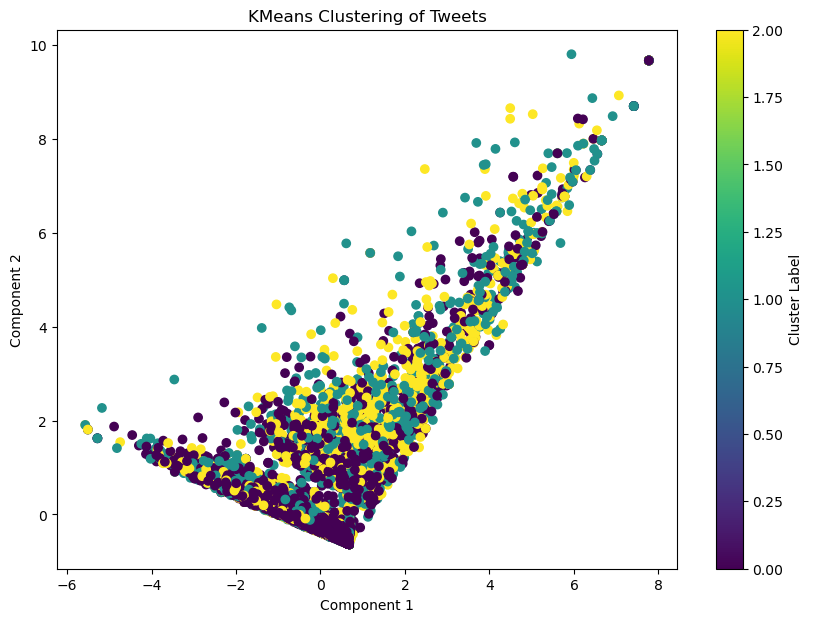

In [11]:
# Plot the KMeans results
plt.figure(figsize=(10, 7))
plt.scatter(tfidf_reduced_scaled[:, 1], tfidf_reduced_scaled[:, 0], c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering of Tweets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

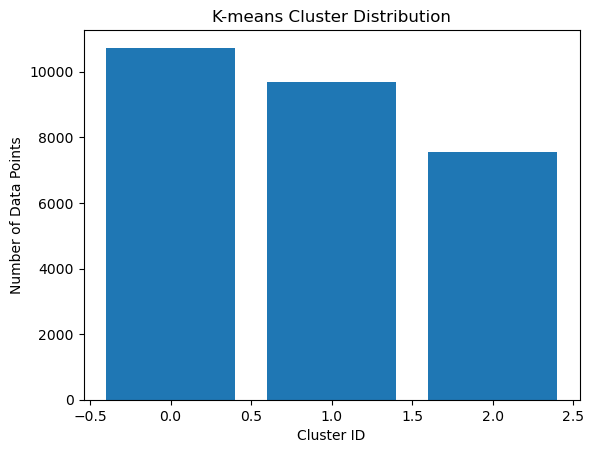

In [12]:
# Bar graph of cluster distribution
plt.bar(range(len(set(merged_df['labels']))), merged_df['labels'].value_counts())
plt.xlabel('Cluster ID')
plt.ylabel('Number of Data Points')
plt.title('K-means Cluster Distribution')
plt.show()

# CLUSTER ANALYSIS

In [13]:
#PRINTING THE FIRST FIVE CLUSTER TEXTS FOR MANUAL INSPECTION
cluster_texts = [merged_df[merged_df['labels'] == i]['cleaned_text'].dropna() for i in range(3)]
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

for i, cluster in enumerate(cluster_sentiments):
    print(f"Cluster {i+1}:")
    for j, sentiment in enumerate(cluster[:2]):  # Limit to the first 5 sentiments
        text = cluster_texts[i].iloc[j]  # Get the text corresponding to the sentiment
        print(f"Text: {text}")
        #print(f"Sentiment: {sentiment}")
    print("================================================================================")


Cluster 1:
Text: im soooooo sleeeeepy last day school todaysniffle
Text: little happy wine jeje ok itsm free time cares jaja love day
Cluster 2:
Text: much love hopeful reckon chances minimal p im never gon na get cake stuff
Text: want go music tonight lost voice
Cluster 3:
Text: id responded going
Text: sooo sad miss san diego


In [14]:
# CLUSTER ANALYSIS
cluster_texts = [merged_df[merged_df['labels'] == i]['cleaned_text'].dropna() for i in range(3)]
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

cluster_avg_sentiments = []
for cluster in cluster_sentiments:
    if cluster:  # Check if the cluster is not empty
        avg_sentiment = {key: sum(score[key] for score in cluster) / len(cluster) for key in cluster[0].keys()}
        cluster_avg_sentiments.append(avg_sentiment)
    else:
        cluster_avg_sentiments.append({})  # Append an empty dictionary for empty clusters


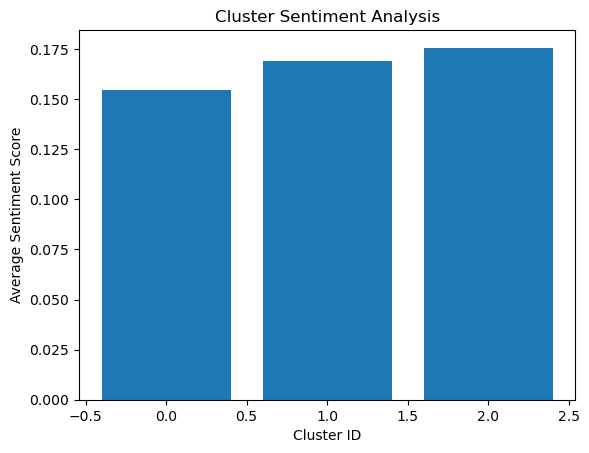

In [15]:
# Bar plot
plt.bar([i for i, cluster in enumerate(cluster_avg_sentiments) if 'compound' in cluster], [cluster['compound'] for cluster in cluster_avg_sentiments if 'compound' in cluster])
plt.xlabel('Cluster ID')
plt.ylabel('Average Sentiment Score')
plt.title('Cluster Sentiment Analysis')
plt.show()


In [22]:
# Get the texts for each cluster
cluster_texts = [merged_df[merged_df['labels'] == i]['cleaned_text'].dropna() for i in range(3)]

# Get the sentiment scores for each text in each cluster
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

# Print Cluster 1 texts and sentiments
print("Cluster 1:")
for text, sentiment in zip(cluster_texts[0][-2:], cluster_sentiments[0][:5]):
    print(f"Text: {text}\nSentiment: {sentiment}\n----------")
print("================================================================================")

# Print Cluster 2 texts and sentiments
print("Cluster 2:")
for text, sentiment in zip(cluster_texts[1][-2:], cluster_sentiments[1][:5]):
    print(f"Text: {text}\nSentiment: {sentiment}\n----------")
print("================================================================================")

# Print Cluster 3 texts and sentiments
print("Cluster 3:")
for text, sentiment in zip(cluster_texts[2][-2:], cluster_sentiments[2][:5]):
    print(f"Text: {text}\nSentiment: {sentiment}\n----------")
print("================================================================================")


Cluster 1:
Text: really im practicing vegetarianism ive seen little results
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----------
Text: trash put kids head shame youor idiot probably seems run family
Sentiment: {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.9442}
----------
Cluster 2:
Text: great visit st brigids callan today met great students good rivalry tipp kk girls
Sentiment: {'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.8519}
----------
Text: wait burger king lax good idea hour flight didnt anyone stop nationalfastfoodday
Sentiment: {'neg': 0.303, 'neu': 0.526, 'pos': 0.171, 'compound': -0.25}
----------
Cluster 3:
Text: go bed muhammad ali
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----------
Text: uh oh bad hombres makes ya go hhmmm
Sentiment: {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compound': -0.5719}
----------


# USING SENTIMENT SCORES FOR CLUSTERING

In [17]:
# Get the texts for each cluster
cluster_texts = [merged_df[merged_df['labels'] == i]['cleaned_text'].dropna() for i in range(3)]

# Get the sentiment scores for each text in each cluster
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

# Get the negative texts (neg >= 0.5)
negative_texts = [text for cluster, sentiments in zip(cluster_texts, cluster_sentiments) for text, sentiment in zip(cluster, sentiments) if sentiment['neg'] >= 0.5]

# Get the neutral texts (neu >= 0.5)
neutral_texts = [text for cluster, sentiments in zip(cluster_texts, cluster_sentiments) for text, sentiment in zip(cluster, sentiments) if sentiment['neu'] >= 0.5]

# Get the positive texts (pos >= 0.5)
positive_texts = [text for cluster, sentiments in zip(cluster_texts, cluster_sentiments) for text, sentiment in zip(cluster, sentiments) if sentiment['pos'] >= 0.5]

In [18]:
# Print only the first 5 texts for each cluster

for text in negative_texts[:2]:
    print(f"Text: {text}\nSentiment: Negative\n----------")
print("======================================================")


for text in neutral_texts[:2]:
    print(f"Text: {text}\nSentiment: Neutral\n----------")
print("======================================================")


for text in positive_texts[:2]:
    print(f"Text: {text}\nSentiment: Positive\n----------")
print("======================================================")

Text: today last day high school ended going home sick stupid dead rats
Sentiment: Negative
----------
Text: bad hair day
Sentiment: Negative
----------
Text: im soooooo sleeeeepy last day school todaysniffle
Sentiment: Neutral
----------
Text: aww love daddy works days week almost day still tries go sf us
Sentiment: Neutral
----------
Text: little happy wine jeje ok itsm free time cares jaja love day
Sentiment: Positive
----------
Text: happy star wars day everyone enjoy holiday uk
Sentiment: Positive
----------


# FOR COMPARISON FOR EVALUATION

In [19]:
# Open the CSV file for writing
with open('cluster_texts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Text', 'Label', 'Cluster', 'Predicted Sentiment', 'Real Sentiment'])
    
    # Write the cluster texts with labels, cluster, predicted sentiment, and real sentiment
    for i, cluster in enumerate(cluster_texts):
        for text, sentiment in zip(cluster, cluster_sentiments[i]):
            predicted_sentiment = 'Negative' if i == 0 else 'Neutral' if i == 1 else 'Positive'
            real_sentiment = 'Negative' if sentiment['neg'] >= 0.5 else 'Neutral' if sentiment['neu'] >= 0.5 else 'Positive'
            writer.writerow([text, merged_df['labels'].iloc[i], f'Cluster {i+1}', predicted_sentiment, real_sentiment])

In [20]:
# import re
# import pickle
# import numpy as np
# import pandas as pd
# from sklearn.decomposition import TruncatedSVD
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Load new tweets
# # Load new tweets
# new_tweets = [
#     "Just saw the most amazing movie! Highly recommend it to everyone.",
#     "I can't believe the weather today—it's raining cats and dogs!",
#     "Feeling so grateful for my friends and family. Life is good.",
#     "This new phone I bought is such a disappointment. Wish I had researched more.",
#     "Had a fantastic workout session at the gym today. Feeling energized!"
# ]


# # Function for text cleaning, tokenization, and normalization
# def clean_text(text):
#     text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and punctuation
#     text = re.sub(r'@user', '', text)  # Remove mentions of @user
#     tokens = word_tokenize(text)  # Tokenize text
#     stop_words = set(stopwords.words('english'))
#     tokens = [word.lower() for word in tokens if word.lower() not in stop_words]  # Remove stopwords
#     return ' '.join(tokens)

# # Preprocess new tweets
# preprocessed_tweets = [clean_text(tweet) for tweet in new_tweets]

# # Load the saved TF-IDF vectorizer
# with open('vectorizer.pkl', 'rb') as f:
#     tfidf_vectorizer = pickle.load(f)

# # Transform new tweets using the loaded vectorizer
# new_tweets_tfidf = tfidf_vectorizer.transform(preprocessed_tweets)

# # Load the saved SVD model (TruncatedSVD for dimensionality reduction)
# with open('svd_model.pkl', 'rb') as f:
#     svd = pickle.load(f)

# # Apply the SVD transformation to the new data (reduce dimensionality)
# new_tweets_reduced = svd.transform(new_tweets_tfidf)

# # Initialize KMeans with the same parameters used during training
# kmeans = KMeans(n_clusters=3)  # Adjust n_clusters if needed

# # Fit the KMeans algorithm to the reduced data
# kmeans.fit(new_tweets_reduced)

# # Predict the clusters for the new data
# kmeans_labels = kmeans.predict(new_tweets_reduced)

# # Create a DataFrame to store results
# df_results = pd.DataFrame({
#     'Tweet': new_tweets,
#     'KMeans_Label': kmeans_labels
# })

# # Display results
# print(df_results)

# # Save the new KMeans cluster labels for further use
# with open('new_kmeans_labels.pkl', 'wb') as f:
#     pickle.dump(kmeans_labels, f)

# # Optionally, save results to a CSV file
# df_results.to_csv('tweets_with_kmeans_labels.csv', index=False)
